 The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

 

## Motivation

Hate  speech  is  an  unfortunately  common  occurrence  on  the  Internet.  Often social media sites like Facebook and Twitter face the problem of identifying and censoring  problematic  posts  while weighing the right to freedom of speech. The  importance  of  detecting  and  moderating hate  speech  is  evident  from  the  strong  connection between hate speech and actual hate crimes. Early identification of users promoting  hate  speech  could  enable  outreach  programs that attempt to prevent an escalation from speech to action. Sites such as Twitter and Facebook have been seeking  to  actively  combat  hate  speech. In spite of these reasons, NLP research on hate speech has been very limited, primarily due to the lack of a general definition of hate speech, an analysis of its demographic influences, and an investigation of the most effective features.

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords

In [2]:
# To see complete width of tweet column

pd.set_option("display.max_colwidth", 200)

#Reading the dataset

df=pd.read_csv('twitter_train.csv')
df_test=pd.read_csv('twitter_test.csv')

# To see first 5 rows of dataset

df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [3]:
# To check last 5 rows of dataset

df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"
31961,31962,0,thank you @user for you follow


In [4]:
# Let’s check out a few non racist/sexist tweets.

df[df['label']==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [5]:
# Let’s check out a few racist/sexist tweets.

df[df['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


There are quite a many words and characters which are not really required. So, we will try to keep only those words which are important and add value.

Let’s check dimensions of the train and test dataset.

In [6]:
df.shape

(31962, 3)

In [7]:
df_test.shape

(17197, 2)

In [8]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

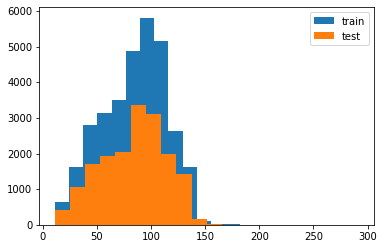

In [9]:
tweet_len = df['tweet'].str.len()
test_tweet_len=df_test['tweet'].str.len()
plt.hist(tweet_len,bins=20,label='train')
plt.hist(test_tweet_len,bins=20,label='test')
plt.legend()
plt.show()

In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

In [10]:
#df['nice_tweet']=df['tweet'].str.replace('@[a-zA-Z]*','')

### 1. Removing Twitter Handles (@user)

Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [11]:
df['nice_tweet']=0
for i in range(len(df['tweet'])):
    #r=re.findall('@[a-zA-Z]*', df['tweet'][i])
    #for j in r:
    df['nice_tweet'][i]=re.sub('@[a-zA-Z]*','',df['tweet'][i])
    
df_test['nice_tweet']=0
for i in range(len(df_test['tweet'])):
    #r=re.findall('@[a-zA-Z]*', df['tweet'][i])
    #for j in r:
    df_test['nice_tweet'][i]=re.sub('@[a-zA-Z]*','',df_test['tweet'][i])

C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User-1\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellAp

### 2. Removing Punctuations, Numbers, and Special Characters

Here we will replace everything except characters and hashtags with spaces. The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [12]:
for i in range(len(df['nice_tweet'])):
    df['nice_tweet'][i]=re.sub('[^a-zA-Z#\s]*','',df['nice_tweet'][i])
    
    
    
    
for i in range(len(df_test['nice_tweet'])):
    df_test['nice_tweet'][i]=re.sub('[^a-zA-Z#\s]*','',df_test['nice_tweet'][i])

C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df.head()

,id,label,tweet,nice_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i cant use cause they dont offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


### 3. Removing Short Words

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [14]:
df['nice_tweet'] = df['nice_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))

In [15]:
df_test['nice_tweet'] = df_test['nice_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
df.head()

,id,label,tweet,nice_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cant cause they dont offer wheelchair vans #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


### 4. Text Normalization

Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [17]:
#for i in range(len(df['nice_tweet'])):    
#    df['nice_tweet'][i] = nltk.word_tokenize(df['nice_tweet'][i])

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
#for i in range(len(df['nice_tweet'])):
#    df['nice_tweet'][i] = [lemmatizer.lemmatize(word) for word in df['nice_tweet'][i]]      

Above given code takes too much time to run and as an data analyst we cant be happy with this lines of code since we are going to work with very huge dataset aso i have wriiten alternative code for this task

In [19]:
df['nice_tweet'] = df['nice_tweet'].apply(lambda x : x.split())

In [20]:
df['nice_tweet'] = df['nice_tweet'].apply(lambda y :  [lemmatizer.lemmatize(w) for w in y])

In [21]:
df_test['nice_tweet'] = df_test['nice_tweet'].apply(lambda x : x.split())
df_test['nice_tweet'] = df_test['nice_tweet'].apply(lambda y :  [lemmatizer.lemmatize(w) for w in y])

In [22]:
df.head()

,id,label,tweet,nice_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,"[when, father, dysfunctional, selfish, drag, kid, into, dysfunction, #run]"
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,"[thanks, #lyft, credit, cant, cause, they, dont, offer, wheelchair, van, #disapointed, #getthanked]"
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,"[#model, love, take, with, time]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, #motivation]"


Now lets sttitch this token back to retreive our cleaned tweet


In [23]:
for i in range(len(df['nice_tweet'])):    
    df['nice_tweet'][i] = ' '.join(df['nice_tweet'][i])
    

C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
for i in range(len(df_test['nice_tweet'])):    
    df_test['nice_tweet'][i] = ' '.join(df_test['nice_tweet'][i])

C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df.head()

,id,label,tweet,nice_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drag kid into dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cant cause they dont offer wheelchair van #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


### Removing stop words

In [26]:
print(set(stopwords.words('english')))

{'no', 'now', "you'll", 'was', 'because', 'ourselves', "you'd", 'under', 'y', "hadn't", 'off', 've', 'you', 'been', 'between', 'how', 'there', "should've", 'very', 'more', 'if', 'above', 'mightn', 'further', 'hadn', 'once', "needn't", 'themselves', 'aren', 'myself', 'is', 'or', 'such', 'yours', 'ours', 'am', 'just', 'this', 'below', 'their', 'itself', 'did', 'the', 'hers', 'and', 'other', 'too', 'about', 't', 'again', "don't", 'll', 'couldn', 'mustn', "wouldn't", 'with', 'didn', 'for', 'her', 'ain', 'can', 'out', 'ma', 'they', 'up', 'herself', 'that', 'but', 'until', 'both', 'from', 'yourself', 'your', 'hasn', 'having', 'do', 'should', "shan't", 'during', 'wouldn', 'we', "hasn't", 'while', 'd', 'at', 'of', "you're", 'which', 'own', "wasn't", 'by', "doesn't", 'so', 'it', 'him', 'his', 'through', 'some', 'm', 'be', 'over', 'wasn', 'what', 'in', 'theirs', 'she', "shouldn't", 'o', 'isn', "isn't", "didn't", 'needn', 'into', "mustn't", 'why', "couldn't", 'he', 'are', 'all', 'has', "weren't",

In [27]:
stop_words = set(stopwords.words('english'))

In [28]:
df['nice_tweet'] = df['nice_tweet'].apply(lambda x : ' '.join([w for w in x.split() if not w in stop_words]))

In [29]:
df_test['nice_tweet'] = df_test['nice_tweet'].apply(lambda x : ' '.join([w for w in x.split() if not w in stop_words]))

# METHOD - 1

## Bag Of Words

### 1) Count Vectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [38]:
count_vectorizer = CountVectorizer(max_df = 0.9 , min_df = 2 , stop_words = 'english' , max_features = 1000)
dff = count_vectorizer.fit_transform(df['nice_tweet'])

### 2) Tfidf Vectorizer

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9 , min_df = 2 , stop_words = 'english' , max_features = 1000)
dfff = tfidf_vectorizer.fit_transform(df['nice_tweet'])

In [42]:
dfff.shape

(31962, 1000)

## Modelling

In [53]:
train_x = dff[:20000 , :]
test_x = dff[20000: , :]

In [54]:
train_y = df['label'][:20000]
test_y = df['label'][20000:]

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x , train_y)
pred = lr.predict(test_x)

In [57]:
from sklearn import metrics
metrics.confusion_matrix(pred , test_y)

array([[11039,   582],
       [   66,   275]], dtype=int64)

In [58]:
metrics.accuracy_score(pred , test_y)

0.9458284567798028

In [60]:
print(metrics.classification_report(pred , test_y))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     11621
           1       0.32      0.81      0.46       341

    accuracy                           0.95     11962
   macro avg       0.66      0.88      0.72     11962
weighted avg       0.97      0.95      0.96     11962



In [73]:
from sklearn.preprocessing import binarize
y_prob=lr.predict_proba(test_x)[:,1]
pred1=binarize([y_prob],0.15)[0]
print(metrics.confusion_matrix(pred1,test_y))

[[10549   363]
 [  556   494]]


C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [74]:
print(metrics.classification_report(pred1 , test_y))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     10912
         1.0       0.58      0.47      0.52      1050

    accuracy                           0.92     11962
   macro avg       0.76      0.72      0.74     11962
weighted avg       0.92      0.92      0.92     11962



# METHOD - 2 Using LSTM

In [38]:
from keras.preprocessing.text import one_hot


onehot_repr=[one_hot(words,5000)for words in df['nice_tweet']] 


In [42]:
from keras.preprocessing.sequence import pad_sequences
embedded_doc = pad_sequences(onehot_repr , padding = 'pre' , maxlen = 20)

In [44]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , LSTM , Bidirectional , Embedding

model=Sequential()
model.add(Embedding(5000 , 50 ,input_length=20))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            250000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 310,501
Trainable params: 310,501
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
X_lstm = np.array(embedded_doc)
y_lstm = df['label']
model.fit(X_lstm , y_lstm)

999/999 [==============================] - 27s 23ms/step - loss: 0.2344 - accuracy: 0.9343


In [49]:
a = model.predict_classes(X_lstm)

In [51]:
len(a)

31962

So while using lstm training accuracy is around 95 % whereas while using concepts of nlp like vectorizer accuracy is just 50 %